# Medical Cost Personal Insurance Project

## Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .




**Predict : Can you accurately predict insurance costs?**

### loading important librabries

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

## loading DATASet from github

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Columns                                            
•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance

## EDA

### Static Analysis

In [4]:
df.shape

(1338, 7)

Dataset contain 1338 columns and 7 rows out of which 6 are features and charge is label.

In [5]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [4]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [5]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

Checking the unique value in categorical variables.

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

cheching the null values in each columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above code we can see there is no null values and datatype of variables are int, object and float.

In [9]:
df.nunique().to_frame()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


From the above code we can see  age  bmi are continues variables and other are categorical variable.

In [10]:
obj_variable=df[['sex','smoker','region']]
obj_variable.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From description:-

1.All column have 1338 values so no missing value present.

2.The std is more than 10 % of mean there might be outliers
- age

3.All the minimum value are value and possible

4.The difference between min,25%,50%,75%  and normal.

5.The mean value is greater than the median (50%) which means the data is skewed to right in these column.
- age


**We only analysis continues variable not the categorical one**

### Graphical Analysis

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

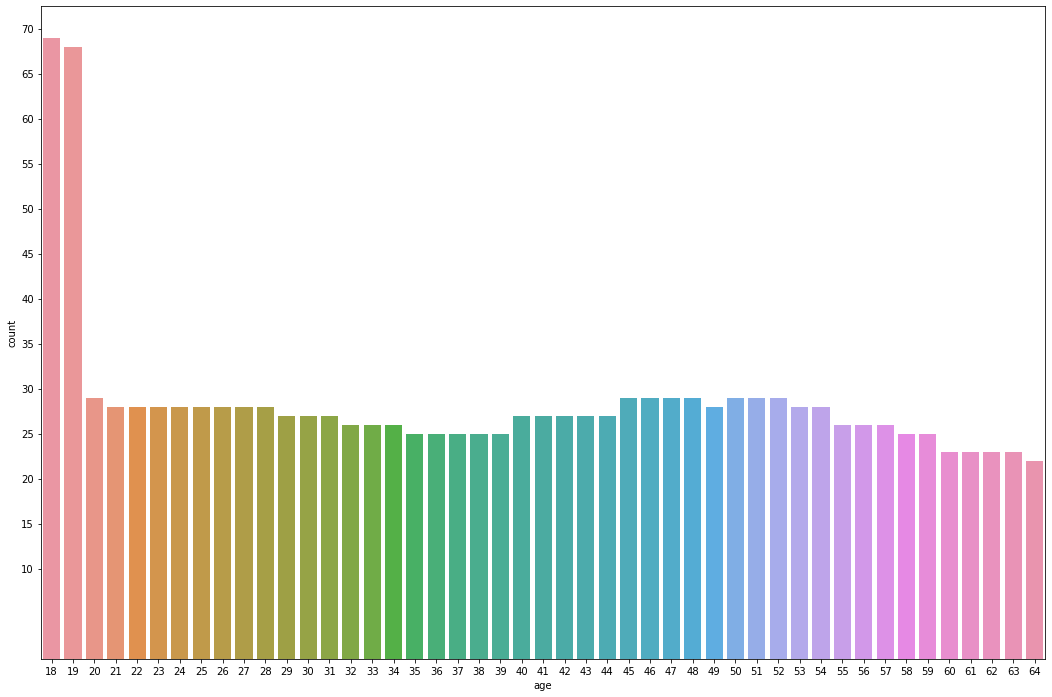

In [40]:
plt.figure(figsize=(18, 12))
ax = sns.countplot(x='age', data=df)

# Set the y-ticks interval
plt.yticks(range(10, 75, 5))
plt.show()

From the above graph we can see more number of customers are of 18,19 years of age

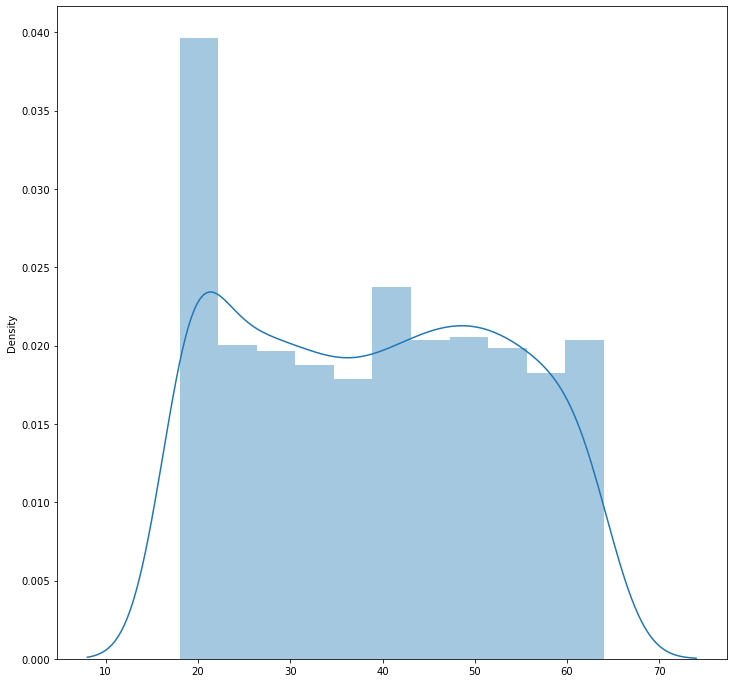

In [41]:
plt.figure(figsize=(12, 12))
ax = sns.distplot(x=df['age'])


From the above graph we can see distribution is normal

male      676
female    662
Name: sex, dtype: int64


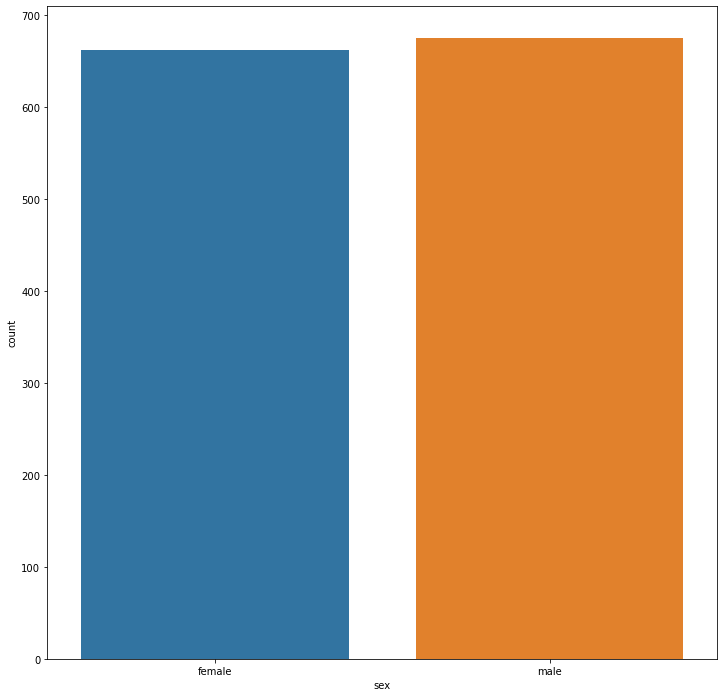

In [32]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='sex', data=df)

# Get the count values for each category
value_counts = df['sex'].value_counts()
print(value_counts)

From the above graph we can see almost equal no. of males and female 

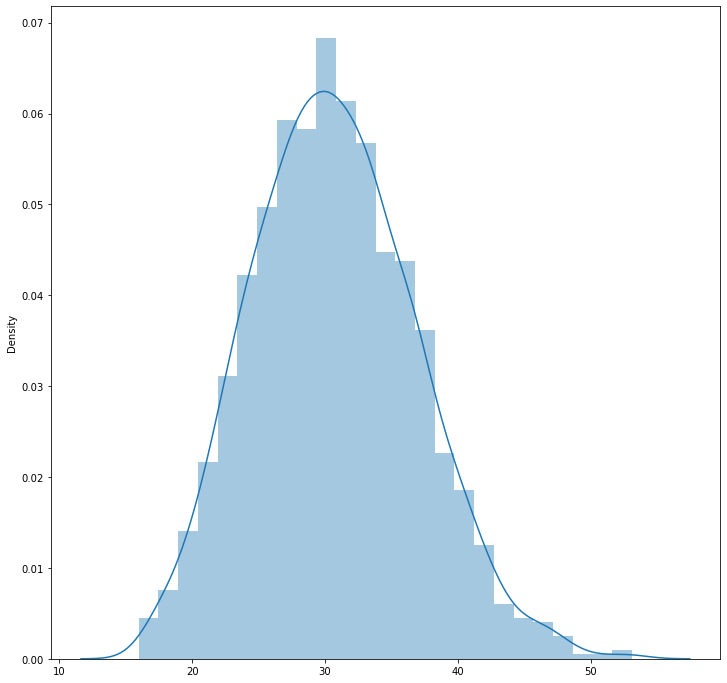

In [38]:
plt.figure(figsize=(12, 12))
ax = sns.distplot(x=df['bmi'])


From the above graph we can see normal distribution.

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


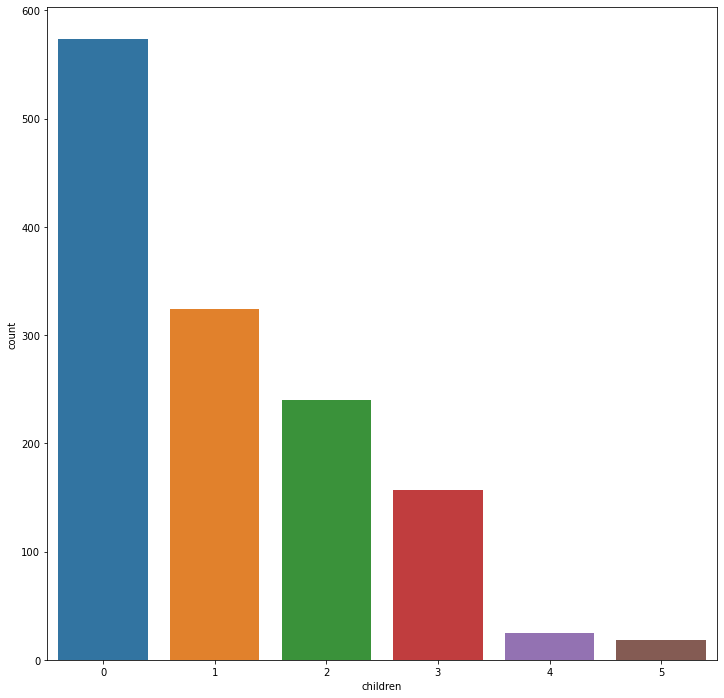

In [42]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='children', data=df)

# Get the count values for each category
value_counts = df['children'].value_counts()
print(value_counts)

From the above graph we can see more number of customers have  less child as the no. of child increases customers decreases.

no     1064
yes     274
Name: smoker, dtype: int64


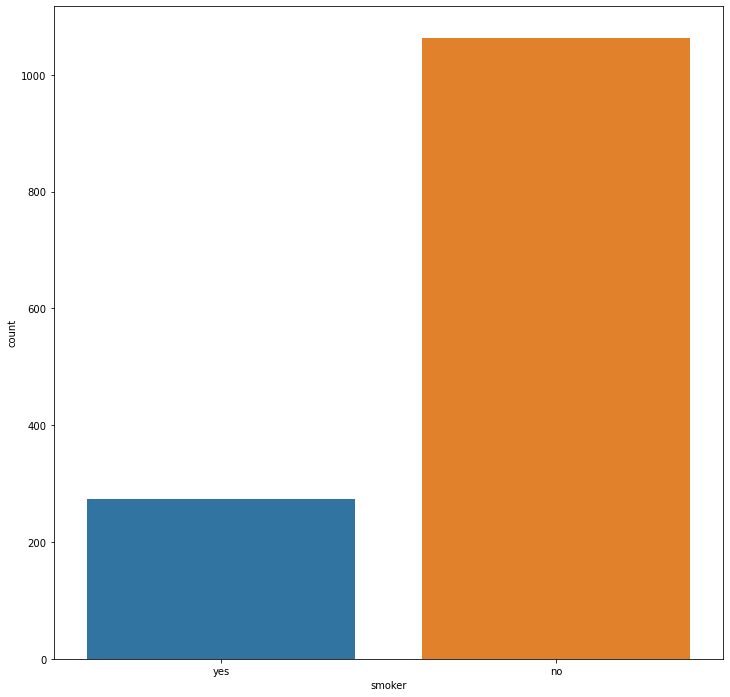

In [43]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='smoker', data=df)

# Get the count values for each category
value_counts = df['smoker'].value_counts()
print(value_counts)

From the above graph we can see more number of customers are are non smoker 1064 compare to smoker.

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


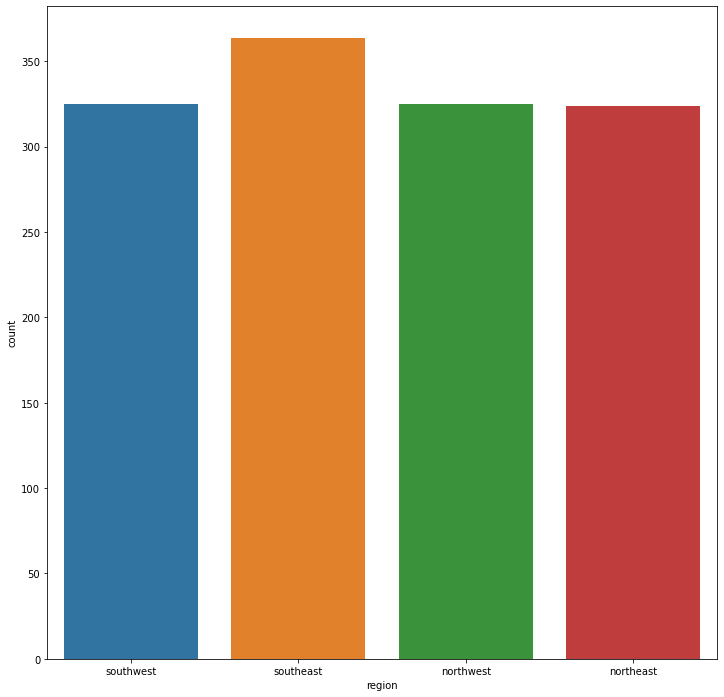

In [44]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='region', data=df)

# Get the count values for each category
value_counts = df['region'].value_counts()
print(value_counts)

From the above graph we can see almost all the region have equal no. of customers.

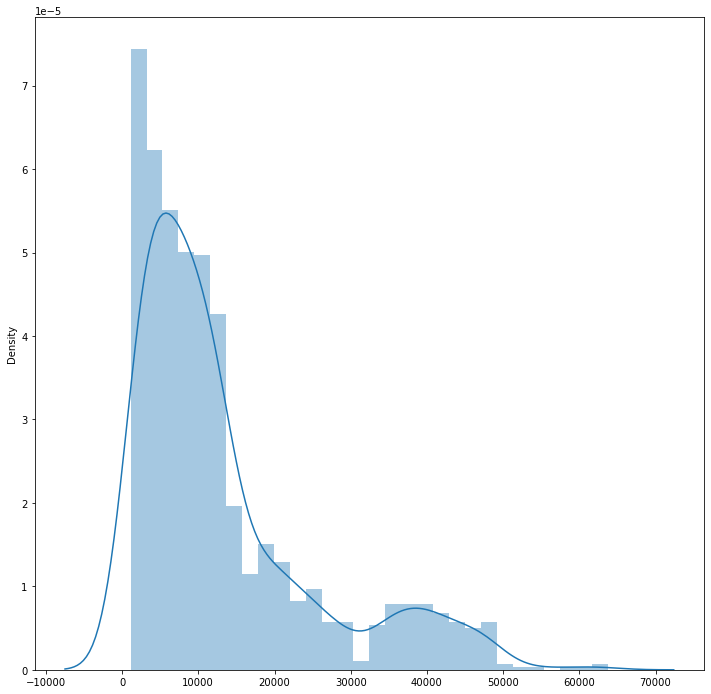

In [45]:
plt.figure(figsize=(12, 12))
ax = sns.distplot(x=df['charges'])


From the above graph we can see more number of customers are paying less than 20000 .

### Bivarient graphical analysis

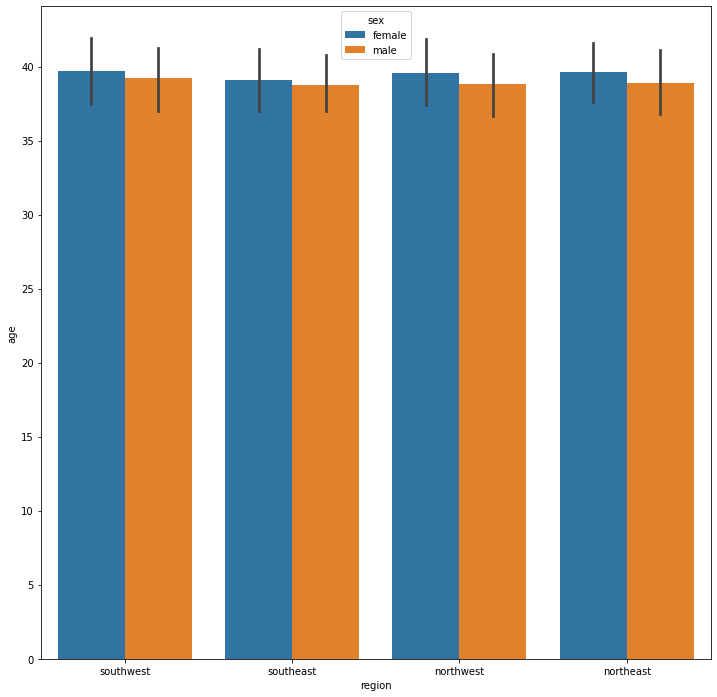

In [68]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(y='age',x='region',data=df,hue='sex')


From the above graph we can see almost all the region have equal no. of customers till age group 40 and  equal age of male and female are in the region

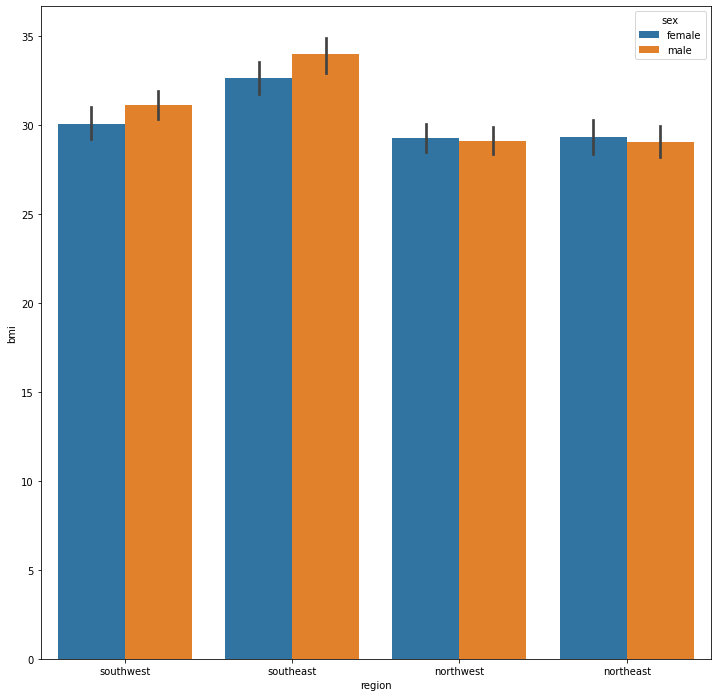

In [74]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(y='bmi',x='region',data=df,hue='sex')


From the above graph we can see almost all the region have equal no. of customers till bmi 30 and male and female have equally bmi as male in the region.
- southeast have higher bmi compare to other

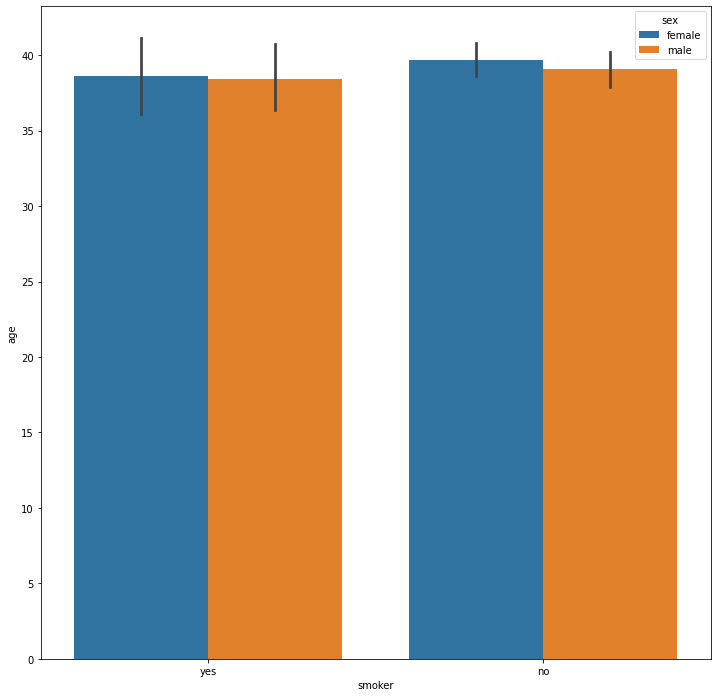

In [75]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(y='age',x='smoker',data=df,hue='sex')


From the above graph we can see almost all the region have equal no. of customers till age 40 and equal ratio of smoking and non smoking in male and female.


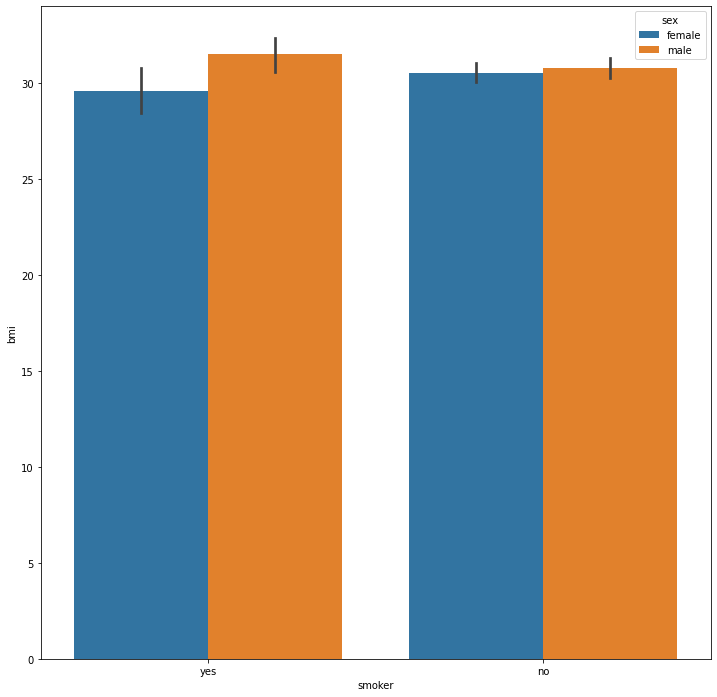

In [76]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(y='bmi',x='smoker',data=df,hue='sex')


- male who smoke have higher bmi compare to female who smoke. 

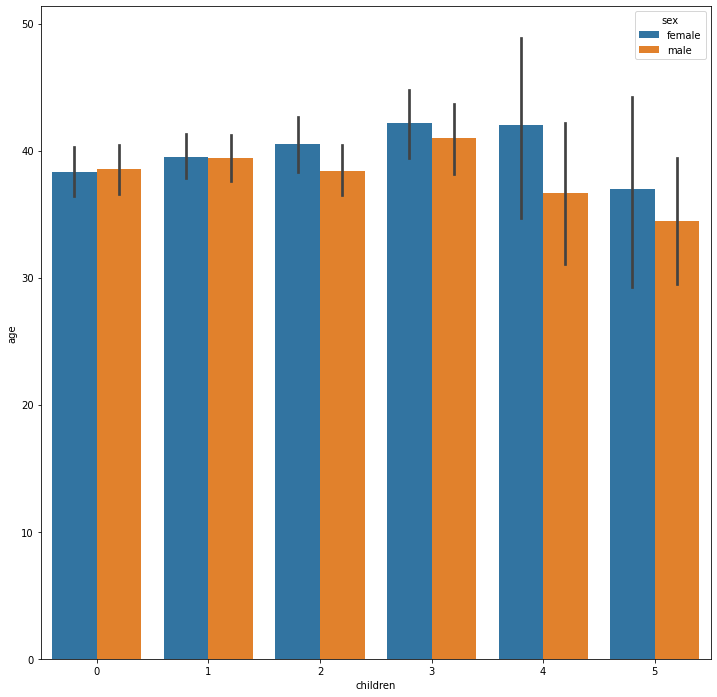

In [77]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(y='age',x='children',data=df,hue='sex')


from the above graph we can see
- person having 3 children have higher age.

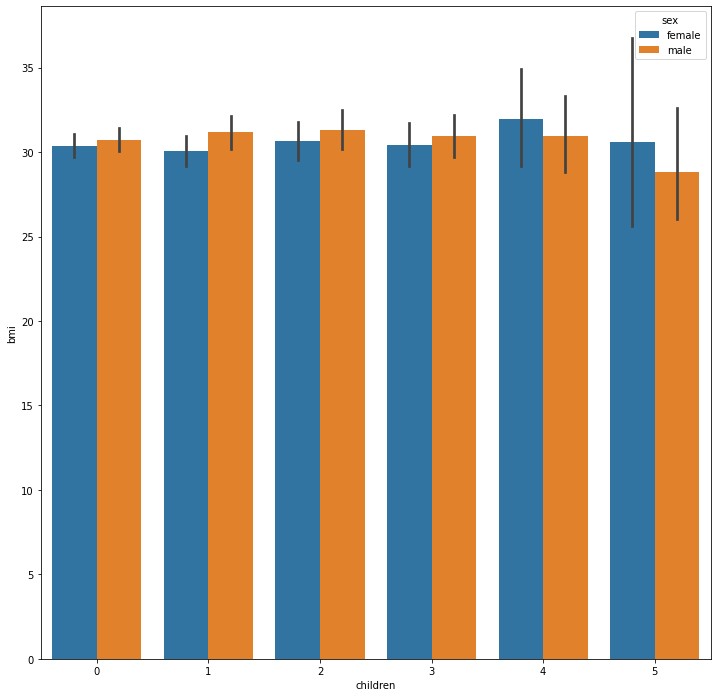

In [72]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(y='bmi',x='children',data=df,hue='sex')


graph shows even distribution of bmi for bmi and no. of children.

### Multivarient Analysis

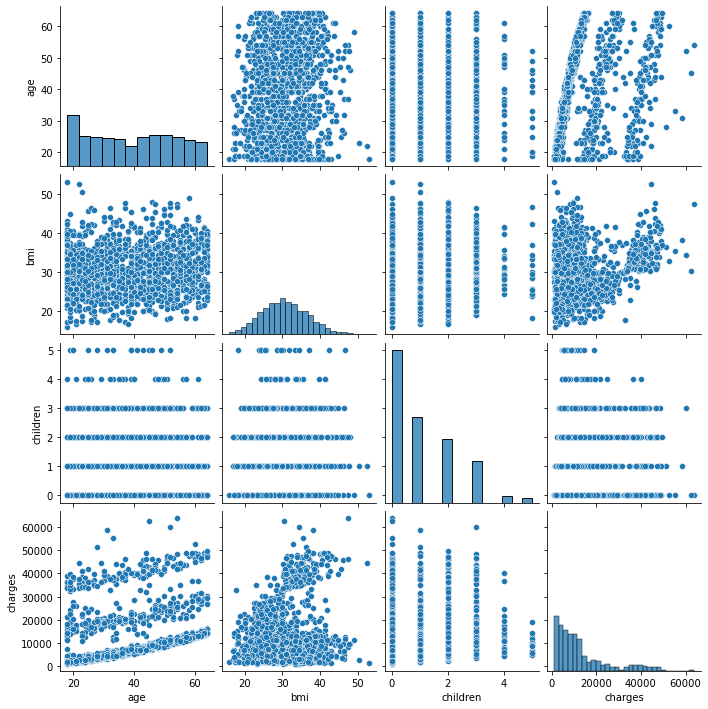

In [79]:
sns.pairplot(data=df)

- Age and charges  are right skewed
- As dependent increases charges seems to decrease

### Checking Outliers

In [84]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

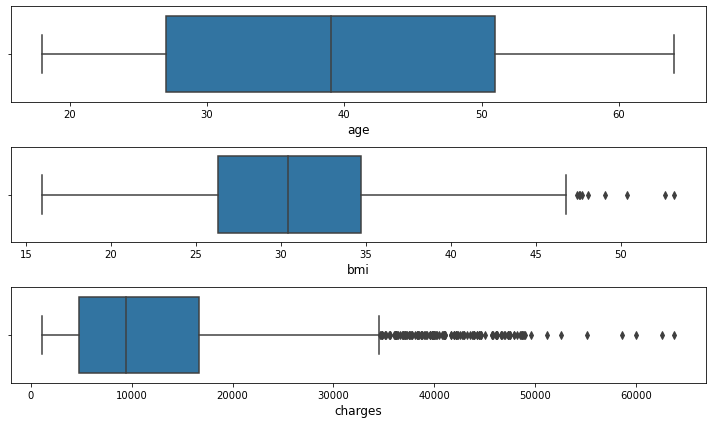

In [86]:

plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in df[['age','bmi','charges']]:
    if plotnumber<=3:
        ax=plt.subplot(3,1,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We only check the numerical continues variables not the categorical one and target variable have outliers but we are not going to remove anything from target variable.
- bmi have outliers

### Removing outliers

In [87]:
# first Quantile
q1=df.quantile(.25)

# third qunatile
q3=df.quantile(.75)

# IQR
iqr=q3-q1

In [88]:
# removing outliers from bmi
outlier=q3.bmi+iqr.bmi
df1=df[df['bmi']>outlier]
df1

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.060,0,no,southeast,11381.32540
286,46,female,48.070,2,no,northeast,9432.92530
292,25,male,45.540,2,yes,southeast,42112.23560
356,46,male,43.890,3,no,southeast,8944.11510
383,35,female,43.340,2,no,southeast,5846.91760
401,47,male,47.520,1,no,southeast,8083.91980
438,52,female,46.750,5,no,southeast,12592.53450
454,32,male,46.530,2,no,southeast,4686.38870
493,61,male,43.400,0,no,southwest,12574.04900
521,32,female,44.220,0,no,southeast,3994.17780


In [90]:
df1.shape[0]

33

In [91]:
percentage_loss=(df1.shape[0]/df.shape[0])*100
percentage_loss

2.4663677130044843

As from domain knowlege bmi can be 54 as in our case its more than outer quntile range  but in actual world it shows extremely obese person, so i am not removing these value and consider them normal data and proceed further.

<AxesSubplot:xlabel='region', ylabel='count'>

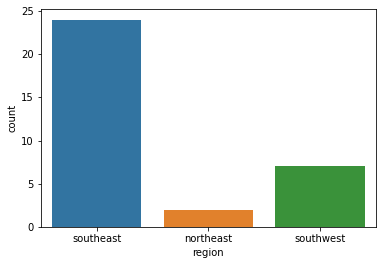

In [92]:
sns.countplot(df1['region'])

Further analysing we can see extremely obese person mostly belong to southeast and no one is extremely obese in northwest.

<AxesSubplot:xlabel='smoker', ylabel='count'>

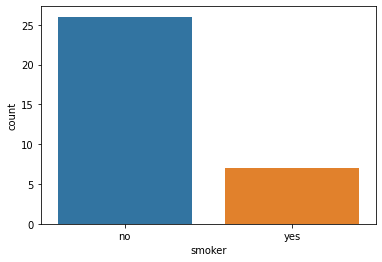

In [93]:
sns.countplot(df1['smoker'])

Further analysing we can see extremely obese person mostly don't smoke

<AxesSubplot:xlabel='sex', ylabel='count'>

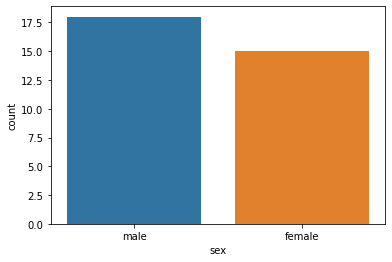

In [94]:
sns.countplot(df1['sex'])

Further analysing we can see extremely obese person are equally from both the gender

<AxesSubplot:xlabel='age', ylabel='count'>

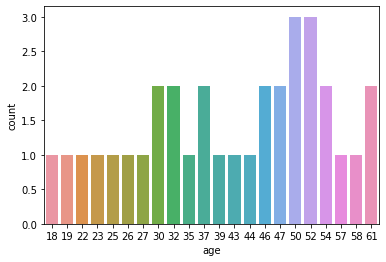

In [95]:
sns.countplot(df1['age'])

Further analysing we can see extremely obese person mostly are above age 45.

### checking skeweness

In [97]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

As acceptable rage is from -0.5 to .05 children is out of range. But we don't change the distribution  of categorical variable.

### Encoding object columns

In [103]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [102]:
from sklearn.preprocessing import LabelEncoder

In [105]:
lab_enc=LabelEncoder()
encode=df[['sex','smoker','region']]
for i in encode:
    df2=lab_enc.fit_transform(encode[i])
    pd.Series(df2)
    df[i]=df2
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


LabelEncoder converted
- sex:- female as 0 and male as 1
- smoker:- yes as 1 and no as 0
- region:- northeast as 0,northwest as 1,southeast as 2 ,southwest as 3

Used label encoder as region have more than 2 categories and there is no order we can use binary encoder for smoker and sex also.

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


As we can see object data type changed to int64

### Correlation between target variable and independent variables

In [107]:
# checking the correlationbetween features and the target.
cor=df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [109]:
import numpy as np

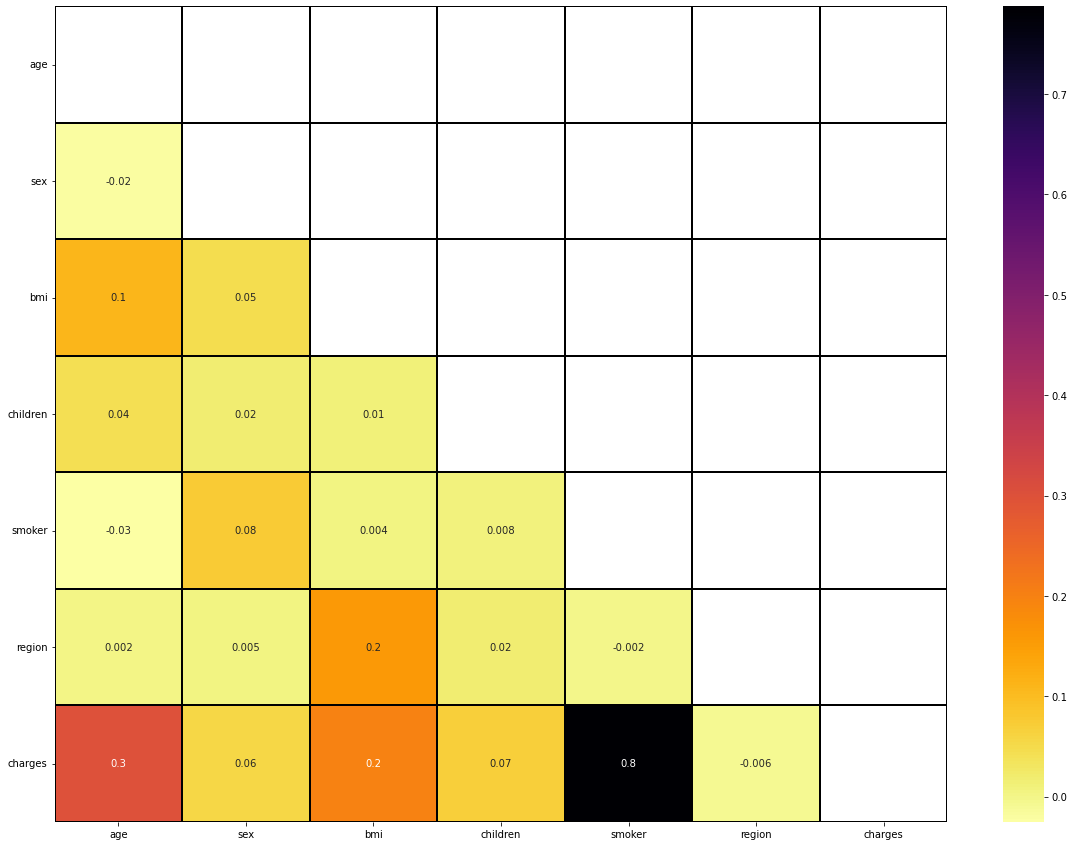

In [111]:
# Visualizing the correlation matrix by plotting heatmap
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), mask=mask, cmap='inferno_r', annot=True, fmt=".1g", linewidths=0.1, ax=ax,linecolor="black")
plt.yticks(rotation=0);
plt.show()

-  From the above graph we can see that smoking is highly correlated with charges.
- sex,region and children are contributing very less but we only have 6 features so we are not going to lose any data.
- No features are correlated with each other,

In [113]:
# correlation with target variable
df.corr().charges.sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

We can observe the positive and negative correlated features with the target.

### Separating features an label

In [117]:
x=df.drop('charges',axis=1)
y=df.charges

In [118]:
x.shape

(1338, 6)

In [119]:
y.shape

(1338,)

### Feature Scaling using Standard Scalarization

In [120]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


We scale only feature not the lable so both needed to be separated initially and Standard Scalar method to overcome the issue of biasness.

### VIF

We didn't find any multicollinearity Still we are going to cross-check

In [121]:
# Finding VIF in each scaled column i.e x.shape[1]/(1/(1-r2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns


vif

,VIF values,Features
0,1.015394,age
1,1.008889,sex
2,1.040608,bmi
3,1.002482,children
4,1.006466,smoker
5,1.025966,region


VIF is in acceptable range for all the features.

### Modelling

In [122]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

#### Finding the best random state

In [126]:
random_states = range(1, 200)
r2_scores = []

for rs in random_states:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=rs)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    r2 = r2_score(y_test, pred)
    r2_scores.append(r2)

max_r2 = max(r2_scores)
max_rs = random_states[r2_scores.index(max_r2)]

print("Best accuracy is", max_r2, "at random_state", max_rs)


Best accuracy is 0.8041576323426197 at random_state 112


#### Creating train test split

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=max_rs)

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor 

In [131]:
training_r2_score = []
testing_r2_score = []

In [132]:
def model_prediction(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    a = r2_score(y_train,y_pred)*100
    b = r2_score(y_test,pred)*100
    training_r2_score.append(a)
    testing_r2_score.append(b)
    print(f"R2_Score of {model} model on Training Data is:",a)
    print(f"R2_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Mean Absolute Error of {model} model is:",mean_absolute_error(y_test,pred))
    print(f"Mean Square Error of {model} model is:", mean_squared_error(y_test,pred))
    print(f"Squarroot Mean Square Error  {model} model is:",np.sqrt(mean_squared_error(y_test,pred)))
    print("\n------------------------------------------------------------------------")

In [134]:
model_prediction(LinearRegression())

R2_Score of LinearRegression() model on Training Data is: 72.53763959645671
R2_Score of LinearRegression() model on Testing Data is: 80.41576323426197

------------------------------------------------------------------------
Mean Absolute Error of LinearRegression() model is: 3916.569265561582
Mean Square Error of LinearRegression() model is: 29880673.555641145
Squarroot Mean Square Error  LinearRegression() model is: 5466.321757419805

------------------------------------------------------------------------


In [136]:
lasscv=LassoCV(alphas=None,max_iter=10)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=10)

In [137]:
alpha=lasscv.alpha_
alpha

69.2848643183652

In [138]:
model_prediction(Lasso(alpha))

R2_Score of Lasso(alpha=69.2848643183652) model on Training Data is: 72.5151234572553
R2_Score of Lasso(alpha=69.2848643183652) model on Testing Data is: 80.44453085022303

------------------------------------------------------------------------
Mean Absolute Error of Lasso(alpha=69.2848643183652) model is: 3907.7315061114446
Mean Square Error of Lasso(alpha=69.2848643183652) model is: 29836781.329878733
Squarroot Mean Square Error  Lasso(alpha=69.2848643183652) model is: 5462.30549583953

------------------------------------------------------------------------


In [140]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [141]:
model_prediction(Ridge(alpha=ridgecv.alpha_))

R2_Score of Ridge(alpha=0.09099999999999998) model on Training Data is: 72.53763882934341
R2_Score of Ridge(alpha=0.09099999999999998) model on Testing Data is: 80.41577303056869

------------------------------------------------------------------------
Mean Absolute Error of Ridge(alpha=0.09099999999999998) model is: 3916.7187268795087
Mean Square Error of Ridge(alpha=0.09099999999999998) model is: 29880658.60891401
Squarroot Mean Square Error  Ridge(alpha=0.09099999999999998) model is: 5466.320390254674

------------------------------------------------------------------------


In [142]:
model_prediction(SVR())

R2_Score of SVR() model on Training Data is: -9.196600273815815
R2_Score of SVR() model on Testing Data is: -7.313099244868915

------------------------------------------------------------------------
Mean Absolute Error of SVR() model is: 8523.47380438049
Mean Square Error of SVR() model is: 163733094.3828185
Squarroot Mean Square Error  SVR() model is: 12795.823317896293

------------------------------------------------------------------------


In [144]:
model_prediction(RandomForestRegressor())

R2_Score of RandomForestRegressor() model on Training Data is: 97.1940350545449
R2_Score of RandomForestRegressor() model on Testing Data is: 89.68149666472098

------------------------------------------------------------------------
Mean Absolute Error of RandomForestRegressor() model is: 2269.748490670049
Mean Square Error of RandomForestRegressor() model is: 15743469.272372609
Squarroot Mean Square Error  RandomForestRegressor() model is: 3967.8040869443907

------------------------------------------------------------------------


In [145]:
model_prediction(GradientBoostingRegressor())

R2_Score of GradientBoostingRegressor() model on Training Data is: 89.20974656760883
R2_Score of GradientBoostingRegressor() model on Testing Data is: 91.24718467553393

------------------------------------------------------------------------
Mean Absolute Error of GradientBoostingRegressor() model is: 2185.587828334625
Mean Square Error of GradientBoostingRegressor() model is: 13354618.846353998
Squarroot Mean Square Error  GradientBoostingRegressor() model is: 3654.397193293854

------------------------------------------------------------------------


In [146]:
model_prediction(DecisionTreeRegressor())

R2_Score of DecisionTreeRegressor() model on Training Data is: 99.86401505730052
R2_Score of DecisionTreeRegressor() model on Testing Data is: 81.19354578560083

------------------------------------------------------------------------
Mean Absolute Error of DecisionTreeRegressor() model is: 2244.2741453955223
Mean Square Error of DecisionTreeRegressor() model is: 28693970.86245838
Squarroot Mean Square Error  DecisionTreeRegressor() model is: 5356.67535533547

------------------------------------------------------------------------


In [147]:
model_prediction(KNeighborsRegressor())

R2_Score of KNeighborsRegressor() model on Training Data is: 85.85323135123244
R2_Score of KNeighborsRegressor() model on Testing Data is: 85.63501742148685

------------------------------------------------------------------------
Mean Absolute Error of KNeighborsRegressor() model is: 3017.257427708955
Mean Square Error of KNeighborsRegressor() model is: 21917390.0007151
Squarroot Mean Square Error  KNeighborsRegressor() model is: 4681.6012218807255

------------------------------------------------------------------------


In [148]:
model_prediction(AdaBoostRegressor())

R2_Score of AdaBoostRegressor() model on Training Data is: 80.40143309328552
R2_Score of AdaBoostRegressor() model on Testing Data is: 85.07131231722063

------------------------------------------------------------------------
Mean Absolute Error of AdaBoostRegressor() model is: 3887.5946282726572
Mean Square Error of AdaBoostRegressor() model is: 22777463.763288025
Squarroot Mean Square Error  AdaBoostRegressor() model is: 4772.574123393792

------------------------------------------------------------------------


In [149]:
model_prediction(XGBRegressor ())

R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.46123669173379
R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [150]:
models=['LinearRegression','Lasso','Ridge','SVR','RandomForestRegressor','GradientBoostingRegressor','DecisionTreeRegressor','KNeighborsRegressor','AdaBoostRegressor','XGBRegressor']

In [151]:
df1 = pd.DataFrame({"Algorithms":models,
                   "Training R2 Score":training_r2_score,
                   "Testing R2 Score":testing_r2_score
                  })
df1

,Algorithms,Training R2 Score,Testing R2 Score
0,LinearRegression,72.537640,80.415763
1,Lasso,72.515123,80.444531
2,Ridge,72.537639,80.415773
3,SVR,-9.196600,-7.313099
4,RandomForestRegressor,97.194035,89.681497
5,GradientBoostingRegressor,89.209747,91.247185
6,DecisionTreeRegressor,99.864015,81.193546
7,KNeighborsRegressor,85.853231,85.635017
8,AdaBoostRegressor,80.401433,85.071312
9,XGBRegressor,99.461237,87.264494


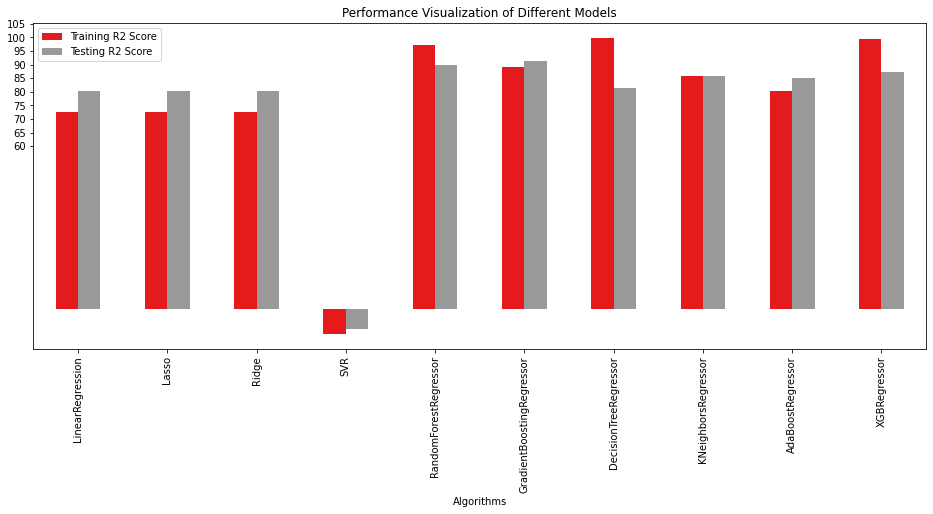

In [153]:
df1.plot(x="Algorithms",y=["Training R2 Score","Testing R2 Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.yticks(range(60,106,5))
plt.show()

## Cross validation score

In [154]:
from sklearn.model_selection import cross_val_score

In [155]:
# checking cv score for logistic Regression
score = cross_val_score(LinearRegression(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[0]/100)- score.mean())

[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
0.7472559473580954
Differnet between Accuracy score and cross validation score is-  0.0569016849845243


In [156]:
# checking cv score for logistic Regression
score = cross_val_score(Lasso(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[1]/100)- score.mean())

[0.76124697 0.70842054 0.77784891 0.73364937 0.75513888]
0.7472609349374297
Differnet between Accuracy score and cross validation score is-  0.05718437356480055


In [157]:
# checking cv score for logistic Regression
score = cross_val_score(Ridge(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[2]/100)- score.mean())

[0.76124956 0.70849269 0.77774855 0.73370746 0.75510598]
0.7472608501582403
Differnet between Accuracy score and cross validation score is-  0.05689688014744654


In [158]:
# checking cv score for logistic Regression
score = cross_val_score(SVR(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[3]/100)- score.mean())

[-0.10984404 -0.10765325 -0.07634203 -0.10157605 -0.1023228 ]
-0.09954763482596678
Differnet between Accuracy score and cross validation score is-  0.02641664237727763


In [159]:
# checking cv score for logistic Regression
score = cross_val_score(RandomForestRegressor(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[4]/100)- score.mean())

[0.85594622 0.77260444 0.86924166 0.828274   0.85620476]
0.8364542145119056
Differnet between Accuracy score and cross validation score is-  0.06036075213530423


In [160]:
# checking cv score for logistic Regression
score = cross_val_score(GradientBoostingRegressor(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[5]/100)- score.mean())

[0.8751076  0.79208176 0.89420007 0.8489758  0.85973898]
0.8540208424172324
Differnet between Accuracy score and cross validation score is-  0.058451004338106904


In [161]:
# checking cv score for logistic Regression
score = cross_val_score(DecisionTreeRegressor(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[6]/100)- score.mean())

[0.76235135 0.64153225 0.75018826 0.73699962 0.67796555]
0.713807405336435
Differnet between Accuracy score and cross validation score is-  0.09812805251957324


In [162]:
# checking cv score for logistic Regression
score = cross_val_score(KNeighborsRegressor(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[7]/100)- score.mean())

[0.8221881  0.7555254  0.83987794 0.8050002  0.80856984]
0.8062322958732286
Differnet between Accuracy score and cross validation score is-  0.05011787834163983


In [163]:
# checking cv score for logistic Regression
score = cross_val_score(AdaBoostRegressor(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[8]/100)- score.mean())

[0.84787859 0.78195809 0.85081001 0.81212786 0.80660978]
0.8198768656682717
Differnet between Accuracy score and cross validation score is-  0.030836257503934594


In [164]:
# checking cv score for logistic Regression
score = cross_val_score(XGBRegressor(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[9]/100)- score.mean())

[0.8260669  0.72512587 0.84979062 0.81971384 0.83490005]
0.8111194559016589
Differnet between Accuracy score and cross validation score is-  0.06152548199216323


From the difference of both R2 score and Cross Validation score computed on R2 score we can conclude that AdaBoostRegressor as our best fitting and best performing model

## Hyper parameter tuning

In [165]:
from sklearn.model_selection import GridSearchCV

### KNeighborsRegressor

In [169]:
model1=KNeighborsRegressor()

In [170]:
param_grid={'n_neighbors':[3,5,7],
           'weights':['uniform', 'distance'],
           'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
           'n_jobs':[-2,-1,1]}

In [172]:
grid_search = GridSearchCV(model1, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [-2, -1, 1], 'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [174]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'algorithm': 'brute', 'n_jobs': -2, 'n_neighbors': 7, 'weights': 'distance'}

In [175]:
model_prediction(KNeighborsRegressor(algorithm= 'brute', n_jobs= -2, n_neighbors= 7, weights= 'distance'))

R2_Score of KNeighborsRegressor(algorithm='brute', n_jobs=-2, n_neighbors=7,
                    weights='distance') model on Training Data is: 99.86401505730007
R2_Score of KNeighborsRegressor(algorithm='brute', n_jobs=-2, n_neighbors=7,
                    weights='distance') model on Testing Data is: 86.79941436072251

------------------------------------------------------------------------
Mean Absolute Error of KNeighborsRegressor(algorithm='brute', n_jobs=-2, n_neighbors=7,
                    weights='distance') model is: 2812.924965990187
Mean Square Error of KNeighborsRegressor(algorithm='brute', n_jobs=-2, n_neighbors=7,
                    weights='distance') model is: 20140809.925286405
Squarroot Mean Square Error  KNeighborsRegressor(algorithm='brute', n_jobs=-2, n_neighbors=7,
                    weights='distance') model is: 4487.851370676886

------------------------------------------------------------------------


### AdaBoostRegressor

In [176]:
model2=AdaBoostRegressor()

In [179]:
param_grid={'n_estimators':[50,100,150],
           'learning_rate':[.001,.005,.01,.03],
           'random_state':['None',100,144],
           'loss':['linear', 'square', 'exponential']}

In [180]:
grid_search = GridSearchCV(model2, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.03],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150],
                         'random_state': ['None', 100, 144]})

In [181]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'learning_rate': 0.005,
 'loss': 'exponential',
 'n_estimators': 100,
 'random_state': 144}

In [183]:
model_prediction(AdaBoostRegressor(**best))

R2_Score of AdaBoostRegressor(learning_rate=0.005, loss='exponential', n_estimators=100,
                  random_state=144) model on Training Data is: 83.80326417378787
R2_Score of AdaBoostRegressor(learning_rate=0.005, loss='exponential', n_estimators=100,
                  random_state=144) model on Testing Data is: 89.58359414436971

------------------------------------------------------------------------
Mean Absolute Error of AdaBoostRegressor(learning_rate=0.005, loss='exponential', n_estimators=100,
                  random_state=144) model is: 2771.8940581672846
Mean Square Error of AdaBoostRegressor(learning_rate=0.005, loss='exponential', n_estimators=100,
                  random_state=144) model is: 15892844.164326977
Squarroot Mean Square Error  AdaBoostRegressor(learning_rate=0.005, loss='exponential', n_estimators=100,
                  random_state=144) model is: 3986.583018617194

------------------------------------------------------------------------


### RandomForestRegressor

In [187]:
model3=RandomForestRegressor()

In [188]:
param_grid={'n_estimators':[50,100,150],
            'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
            'max_depth':[0,2,4],
            'max_features':['sqrt', 'log2', None]
    
}

In [189]:
grid_search = GridSearchCV(model3, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [0, 2, 4],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 150]})

In [190]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'n_estimators': 100}

In [191]:
model_prediction(RandomForestRegressor(criterion= 'squared_error',max_depth= 4,max_features= None,n_estimators= 100))

R2_Score of RandomForestRegressor(max_depth=4, max_features=None) model on Training Data is: 85.79313433567614
R2_Score of RandomForestRegressor(max_depth=4, max_features=None) model on Testing Data is: 91.30226882677606

------------------------------------------------------------------------
Mean Absolute Error of RandomForestRegressor(max_depth=4, max_features=None) model is: 2275.2565988195465
Mean Square Error of RandomForestRegressor(max_depth=4, max_features=None) model is: 13270574.134219231
Squarroot Mean Square Error  RandomForestRegressor(max_depth=4, max_features=None) model is: 3642.879923112925

------------------------------------------------------------------------


### GradientBoostingRegressor

In [193]:
model4=GradientBoostingRegressor()

In [192]:
param_grid={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
           'learning_rate':[.001,.005,.01,.03],
           'n_estimators':[50,100,150],
           'criterion':['friedman_mse', 'squared_error']}

In [194]:
grid_search = GridSearchCV(model4, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.001, 0.005, 0.01, 0.03],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [50, 100, 150]})

In [195]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'criterion': 'squared_error',
 'learning_rate': 0.03,
 'loss': 'squared_error',
 'n_estimators': 150}

In [199]:
model_prediction(GradientBoostingRegressor(criterion= 'squared_error',learning_rate= 0.03,loss= 'squared_error',n_estimators=150))

R2_Score of GradientBoostingRegressor(criterion='squared_error', learning_rate=0.03,
                          n_estimators=150) model on Training Data is: 86.4177087499716
R2_Score of GradientBoostingRegressor(criterion='squared_error', learning_rate=0.03,
                          n_estimators=150) model on Testing Data is: 91.51688938229682

------------------------------------------------------------------------
Mean Absolute Error of GradientBoostingRegressor(criterion='squared_error', learning_rate=0.03,
                          n_estimators=150) model is: 2216.06805943411
Mean Square Error of GradientBoostingRegressor(criterion='squared_error', learning_rate=0.03,
                          n_estimators=150) model is: 12943116.555220488
Squarroot Mean Square Error  GradientBoostingRegressor(criterion='squared_error', learning_rate=0.03,
                          n_estimators=150) model is: 3597.654312912858

-----------------------------------------------------------------------

In [206]:
m=GradientBoostingRegressor(criterion= 'squared_error',learning_rate= 0.03,loss= 'squared_error',n_estimators=150)
m.fit(x_train,y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.03,
                          n_estimators=150)

GradientBoostingRegressor is the best model with highest score.

### Saving the model

In [207]:
import pickle
filename='MedicalCost.pkl'
pickle.dump(m,open(filename,'wb'))#saved model

In [208]:
loaded_model=pickle.load(open('MedicalCost.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

91.51688938229682


In [209]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
Predicted,12117.145356,8686.864695,35085.503711,24167.547932,23976.554909,8686.864695,8705.555466,20945.931428,6759.069741,4859.412344,...,7781.382575,38401.125097,13986.623542,8320.15280,11366.924342,7309.179556,6620.915629,10155.399961,5188.427357,3908.950249
Original,11090.717800,8017.061150,34617.840650,24535.698550,23967.383050,8059.679100,8252.284300,20745.989100,5253.524000,1719.436300,...,7046.722200,36307.798300,13415.038100,6402.29135,9866.304850,5972.378000,5245.226900,6948.700800,2680.949300,1969.614000
